In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stat
import sklearn.model_selection 
from sklearn.model_selection import train_test_split 
header_row = 0

In [5]:
offense_stats = pd.read_csv('offense_stats.csv') # Offensive Stats
offense_stats.columns = offense_stats.iloc[header_row]
offense_stats = offense_stats.drop(header_row)
offense_stats = offense_stats.drop(columns=['Pen'])
offense_stats = offense_stats.drop(columns=['TO%'])
offense_stats = offense_stats.drop(columns=['Sc%'])
offense_stats = offense_stats.drop(columns=['Rk'])
offense_stats = offense_stats.drop(columns=['1stPy'])
offense_stats = offense_stats.iloc[: , :-2]
offense_stats = offense_stats.drop(columns=['1stD'])
offense_stats = offense_stats.drop(columns=['FL'])
offense_stats.columns = ['Team', 'Games','Total Points For','Total Yards', 'Total Plays', 'Total Yards/Play', 'Total Turnovers', 'Passing Completitons', 'Passing Attempts', 'Passing Yards',\
    'Passing TD', 'Passing Int', 'Net Yards/Attempt', 'Rushing Attempts', 'Total Rushing Yards', 'Rushing TDs', 'Yards/Attempt']
offense_stats = offense_stats.drop([33, 34,35])
offense_stats = offense_stats.sort_values(by=['Team']).reset_index(drop=True)
offense_stats.head()

,Team,Games,Total Points For,Total Yards,Total Plays,Total Yards/Play,Total Turnovers,Passing Completitons,Passing Attempts,Passing Yards,Passing TD,Passing Int,Net Yards/Attempt,Rushing Attempts,Total Rushing Yards,Rushing TDs,Yards/Attempt
0,Arizona Cardinals,13,366,4872,845,5.8,13,304,420,3279,22,10,7.3,394,1593,21,4.0
1,Atlanta Falcons,13,245,4113,805,5.1,20,307,461,2929,17,14,6.0,318,1184,8,3.7
2,Baltimore Ravens,13,304,5044,921,5.5,20,304,467,3161,17,14,6.1,407,1883,14,4.6
3,Buffalo Bills,13,363,4978,853,5.8,18,330,502,3405,28,12,6.5,329,1573,13,4.8
4,Carolina Panthers,13,257,4038,838,4.8,23,262,447,2612,11,17,5.5,359,1426,15,4.0


In [6]:
passing_stats = pd.read_csv('passing_stats.csv') # Passing Stats
passing_stats = passing_stats.drop(columns=['4QC'])
passing_stats = passing_stats.drop(columns=['GWD'])
passing_stats = passing_stats.drop(columns=['Sk%'])
passing_stats = passing_stats.drop(columns=['Rk'])
passing_stats = passing_stats.drop(columns=['EXP'])
passing_stats = passing_stats.drop(columns=['Yds.1'])
passing_stats = passing_stats.drop(columns=['Int%'])
passing_stats = passing_stats.drop(columns=['TD%'])
passing_stats = passing_stats.drop(columns=['Rate'])
passing_stats = passing_stats.drop(columns=['Sk'])
passing_stats = passing_stats.drop(columns=['Lng'])
passing_stats = passing_stats.rename(columns={"Tm": "Team", "G": "Games", "Ply": "Total Ply", "Y/P":"Total Y/P", 'Cmp':'Completions', 'Cmp%':'Completion %'})
passing_stats.rename(columns={passing_stats.columns[5]: "Total Yards" }, inplace = True)
passing_stats = passing_stats.drop([32, 33,34])
passing_stats = passing_stats.sort_values(by=['Team']).reset_index(drop=True)
passing_stats.head()

,Team,Games,Completions,Att,Completion %,Total Yards,TD,Int,Y/A,AY/A,Y/C,Y/G,NY/A,ANY/A
0,Arizona Cardinals,13.0,304.0,420.0,72.4,3279.0,22.0,10.0,8.4,8.4,11.6,252.2,7.3,7.2
1,Atlanta Falcons,13.0,307.0,461.0,66.6,2929.0,17.0,14.0,6.8,6.1,10.2,225.3,6.0,5.4
2,Baltimore Ravens,13.0,304.0,467.0,65.1,3161.0,17.0,14.0,7.3,6.7,11.2,243.2,6.1,5.6
3,Buffalo Bills,13.0,330.0,502.0,65.7,3405.0,28.0,12.0,7.1,7.1,10.8,261.9,6.5,6.5
4,Carolina Panthers,13.0,262.0,447.0,58.6,2612.0,11.0,17.0,6.3,5.1,10.7,200.9,5.5,4.3


In [7]:
rushing_stats = pd.read_csv('rushing_stats.csv') 
rushing_stats = rushing_stats.drop(columns=['Rk'])
rushing_stats = rushing_stats.drop(columns=['EXP'])
rushing_stats = rushing_stats.drop(columns=['Lng'])
rushing_stats = rushing_stats.rename(columns={"Tm": "Team", "G": "Games"})
rushing_stats.rename(columns={rushing_stats.columns[3]: "Total Yards" }, inplace = True)
rushing_stats = rushing_stats.drop([32,33,34])
rushing_stats = rushing_stats.sort_values(by=['Team']).reset_index(drop=True)
display(rushing_stats.head())

,Team,Games,Att,Total Yards,TD,Y/A,Y/G,Fmb
0,Arizona Cardinals,13.0,394.0,1593.0,21.0,4.0,122.5,25.0
1,Atlanta Falcons,13.0,318.0,1184.0,8.0,3.7,91.1,18.0
2,Baltimore Ravens,13.0,407.0,1883.0,14.0,4.6,144.8,16.0
3,Buffalo Bills,13.0,329.0,1573.0,13.0,4.8,121.0,19.0
4,Carolina Panthers,13.0,359.0,1426.0,15.0,4.0,109.7,15.0


In [37]:
defense_stats = pd.read_csv('defense_stats.csv', index_col=False) # Defensive Stats
defense_stats.columns = defense_stats.iloc[header_row]
defense_stats = defense_stats.drop(header_row)
#defense_stats = defense_stats.drop(columns= ["Rk"])
defense_stats = defense_stats.drop(columns= ["FL"])
defense_stats = defense_stats.drop(columns= ["1stD"])
defense_stats = defense_stats.drop(columns= ["TO%"])
defense_stats = defense_stats.drop(columns= ["Sc%"])
defense_stats = defense_stats.drop(columns= ["EXP"])
defense_stats = defense_stats.drop(columns= ["Pen"])
defense_stats = defense_stats.drop(columns= ["1stPy"])
defense_stats = defense_stats.drop(columns= ["Int"])
defense_stats = defense_stats.drop(columns= ["TD"])
defense_stats = defense_stats.drop(columns= ["Cmp"])
defense_stats = defense_stats.drop(columns= ["Att"])
# defense_stats = defense_stats.drop(columns= defense_stats.columns[[16]], axis=1)
defense_stats = defense_stats.iloc[:,~defense_stats.columns.duplicated()]
defense_stats = defense_stats.rename(columns={"Tm": "Team", "G": "Games", "Yds": "Total Yards Allowed", "Ply": "Total Ply", "NY/P":"Net Yards per Pass Allowed", "Y/A":"Rushing Yards Allowed"\
    , "TO":"Total TOs", "PA":"Points Allowed"})
defense_stats = defense_stats.drop([33, 34,35])
defense_stats = defense_stats.sort_values(by=['Team']).reset_index(drop=True)
defense_stats.head()

,Rk,Team,Games,Points Allowed,Total Yards Allowed,Total Ply,Y/P,Total TOs,NY/A,Rushing Yards Allowed
0,4,Arizona Cardinals,13,254,4181,789,5.3,23,5.7,4.7
1,28,Atlanta Falcons,13,353,4739,848,5.6,15,6.6,4.2
2,10,Baltimore Ravens,13,284,4570,773,5.9,11,7.0,3.9
3,3,Buffalo Bills,13,229,3756,787,4.8,26,5.3,4.1
4,8,Carolina Panthers,13,282,3809,783,4.9,15,5.6,4.1


In [38]:
passdef_stats = pd.read_csv('passdef_stats.csv') # Passing Defense Stats
passdef_stats = passdef_stats.drop(columns= ["Rk"])
passdef_stats = passdef_stats.drop(columns= ["QBHits"])
passdef_stats = passdef_stats.drop(columns= ["PD"])
passdef_stats = passdef_stats.drop(columns= ["Rate"])
passdef_stats = passdef_stats.drop(columns= ["Sk"])
passdef_stats = passdef_stats.drop(columns= ["Yds.1"]) 
passdef_stats = passdef_stats.drop(columns= ["TFL"])
passdef_stats = passdef_stats.drop(columns= ["Sk%"])
passdef_stats = passdef_stats.drop(columns= ["EXP"])
passdef_stats = passdef_stats.drop([32,33, 34])
passdef_stats = passdef_stats.sort_values(by=['Tm']).reset_index(drop=True)
display(passdef_stats.head())

,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,NY/A,ANY/A
0,Arizona Cardinals,13.0,288.0,442.0,65.2,2728.0,19.0,4.3,12.0,2.7,6.6,6.3,10.2,209.8,5.7,5.4
1,Atlanta Falcons,13.0,321.0,468.0,68.6,3217.0,26.0,5.6,8.0,1.7,7.2,7.5,10.5,247.5,6.6,7.0
2,Baltimore Ravens,13.0,281.0,465.0,60.4,3459.0,21.0,4.5,6.0,1.3,7.8,8.2,13.0,266.1,7.0,7.4
3,Buffalo Bills,13.0,245.0,417.0,58.8,2334.0,10.0,2.4,16.0,3.8,5.9,4.7,10.0,179.5,5.3,4.1
4,Carolina Panthers,13.0,254.0,383.0,66.3,2310.0,18.0,4.7,8.0,2.1,6.7,6.7,10.1,177.7,5.6,5.6


In [39]:
rushdef_stats = pd.read_csv('rushdef_stats.csv') 
rushdef_stats = rushdef_stats.drop(columns= ["EXP"])
rushdef_stats = rushdef_stats.drop(columns= ["Rk"])
rushdef_stats = rushdef_stats.drop([32,33, 34])
rushdef_stats = rushdef_stats.sort_values(by=['Tm']).reset_index(drop=True)
rushdef_stats.head()

,Tm,G,Att,Yds,TD,Y/A,Y/G
0,Arizona Cardinals,13.0,312.0,1453.0,8.0,4.7,111.8
1,Atlanta Falcons,13.0,364.0,1522.0,12.0,4.2,117.1
2,Baltimore Ravens,13.0,282.0,1111.0,10.0,3.9,85.5
3,Buffalo Bills,13.0,347.0,1422.0,14.0,4.1,109.4
4,Carolina Panthers,13.0,368.0,1499.0,11.0,4.1,115.3


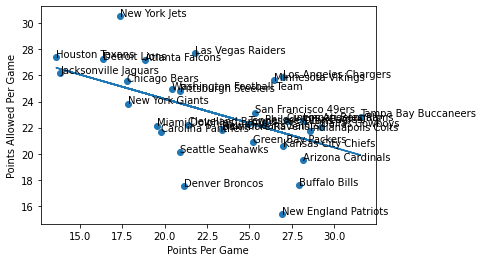

In [40]:
offense_stats['Points Per Game'] = offense_stats['Total Points For'].astype(float) / offense_stats['Games'].astype(float)
ppg = offense_stats['Points Per Game']
defense_stats['Points Allowed Per Game'] = defense_stats['Points Allowed'].astype(float) / defense_stats['Games'].astype(float)
papg = defense_stats['Points Allowed Per Game']

plt.scatter(offense_stats['Points Per Game'], defense_stats['Points Allowed Per Game'])
plt.xlabel("Points Per Game")
plt.ylabel("Points Allowed Per Game")
m, b = np.polyfit(offense_stats['Points Per Game'].head(32), defense_stats['Points Allowed Per Game'], 1)
plt.plot(offense_stats['Points Per Game'], m*offense_stats['Points Per Game'] + b)
for i, row in offense_stats.iterrows():
    plt.annotate(row.Team, (ppg[i], papg[i]))

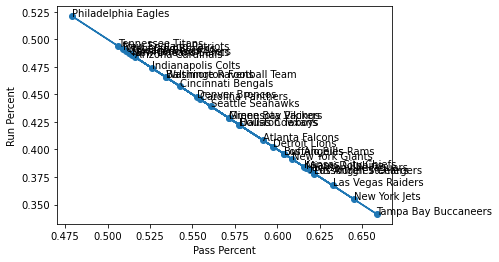

In [41]:
# Run vs Pass
offense_stats['Total Plays(Only Run and Pass'] = offense_stats['Passing Attempts'].astype(float) + offense_stats['Rushing Attempts'].astype(float)
offense_stats['Pass Percent'] = offense_stats['Passing Attempts'].astype(float)/offense_stats['Total Plays(Only Run and Pass'].astype(float)
offense_stats['Run Percent'] = offense_stats['Rushing Attempts'].astype(float)/offense_stats['Total Plays(Only Run and Pass'].astype(float)

plt.scatter(offense_stats['Pass Percent'], offense_stats['Run Percent'])
plt.xlabel("Pass Percent")
plt.ylabel("Run Percent")
m, b = np.polyfit(offense_stats['Pass Percent'].head(32), offense_stats['Run Percent'], 1)
plt.plot(offense_stats['Pass Percent'], m*offense_stats['Pass Percent'] + b)
for i, row in offense_stats.iterrows():
    plt.annotate(row.Team, (offense_stats['Pass Percent'][i], offense_stats['Run Percent'][i]))

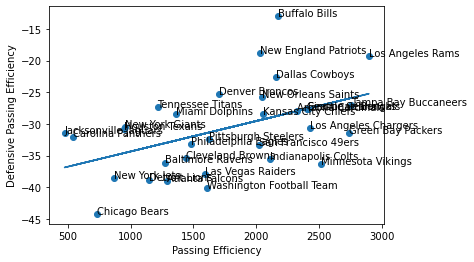

In [42]:
passing_stats['Passing Efficiency'] = (passing_stats["Completion %"].astype(float) * (passing_stats["Total Yards"].astype(float)/passing_stats["Att"].astype(float))) + \
    (passing_stats["Completion %"].astype(float) * (passing_stats["TD"].astype(float)/passing_stats["Att"].astype(float))*100*6) - \
    (passing_stats["Completion %"].astype(float) * (passing_stats["Int"].astype(float)/passing_stats["Att"].astype(float))*100*3)
passdef_stats['Defensive Passing Efficiency'] = (passdef_stats["Int%"].astype(float))*3 - \
    (passdef_stats["TD%"].astype(float))*(6) - \
    (passdef_stats["Y/C"].astype(float))

plt.scatter(passing_stats['Passing Efficiency'], passdef_stats['Defensive Passing Efficiency'])
plt.xlabel("Passing Efficiency")
plt.ylabel("Defensive Passing Efficiency")

m, b = np.polyfit(passing_stats['Passing Efficiency'].head(32), passdef_stats['Defensive Passing Efficiency'], 1)
plt.plot(passing_stats['Passing Efficiency'], m*passing_stats['Passing Efficiency'] + b)
for i, row in passing_stats.iterrows():
    plt.annotate(row.Team, (passing_stats['Passing Efficiency'][i], passdef_stats['Defensive Passing Efficiency'][i]))

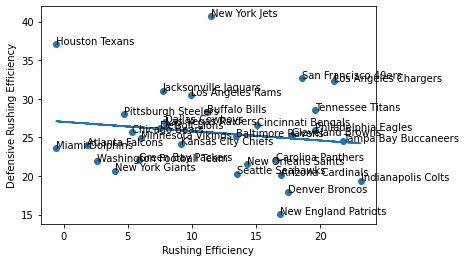

In [43]:
rushing_stats['Rushing Efficiency'] = (rushing_stats["Y/A"].astype(float))\
     + (rushing_stats["TD"].astype(float) /rushing_stats["Att"].astype(float)) * 100*6\
     - (rushing_stats["Fmb"].astype(float) /rushing_stats["Att"].astype(float)) * 100*3
rushdef_stats['Defensive Rushing Efficiency'] = (rushdef_stats["Y/A"].astype(float)) + ((rushdef_stats["TD"].astype(float) /rushdef_stats["Att"].astype(float)) * 100)*6
plt.scatter(rushing_stats['Rushing Efficiency'], rushdef_stats['Defensive Rushing Efficiency'])
plt.xlabel("Rushing Efficiency")
plt.ylabel("Defensive Rushing Efficiency")

m, b = np.polyfit(rushing_stats['Rushing Efficiency'].head(32), rushdef_stats['Defensive Rushing Efficiency'], 1)
plt.plot(rushing_stats['Rushing Efficiency'], m*rushing_stats['Rushing Efficiency'] + b)
for i, row in rushing_stats.iterrows():
    plt.annotate(row.Team, (rushing_stats['Rushing Efficiency'][i], rushdef_stats['Defensive Rushing Efficiency'][i]))

In [65]:
df = pd.DataFrame(offense_stats['Team'])
df['RushPercent'] = offense_stats['Run Percent']
df['RushEfficiency'] = rushing_stats['Rushing Efficiency']
df['PassPercent'] = offense_stats['Pass Percent']
df['PassEfficiency'] = passing_stats['Passing Efficiency']
df['DRushEfficiency'] = rushdef_stats['Defensive Rushing Efficiency']
df['DPassEfficiency'] = passdef_stats['Defensive Passing Efficiency']
df['DefenseRank'] = defense_stats['Rk']
df['OffensiveTO%'] = offense_stats['Total Turnovers'].astype(float)/offense_stats['Total Plays'].astype(float)
df['DefensiveTO%'] = defense_stats['Total TOs'].astype(float)/defense_stats['Total Ply'].astype(float)
df.insert(10, "Value", 1)
df.head()

,Team,RushPercent,RushEfficiency,PassPercent,PassEfficiency,DRushEfficiency,DPassEfficiency,DefenseRank,OffensiveTO%,DefensiveTO%,Value
0,Arizona Cardinals,0.484029,16.944162,0.515971,2323.522857,20.084615,-27.9,4,0.015385,0.029151,1
1,Atlanta Falcons,0.408216,1.813208,0.591784,1289.959653,23.980220,-39.0,28,0.024845,0.017689,1
2,Baltimore Ravens,0.465675,13.445209,0.534325,1277.047323,25.176596,-36.1,10,0.021716,0.014230,1
3,Buffalo Bills,0.395909,11.182979,0.604091,2173.204183,28.307493,-13.0,3,0.021102,0.033037,1
4,Carolina Panthers,0.445409,16.534819,0.554591,539.067562,22.034783,-32.0,8,0.027446,0.019157,1


In [78]:
from statsmodels.formula.api import ols
formula_str = "Value ~ ((RushPercent * RushEfficiency) + (PassPercent * PassEfficiency)) - ((RushPercent * DRushEfficiency) - (PassPercent * DPassEfficiency)) - (DefenseRank * (OffensiveTO% - DefensiveTO%))"
mod = ols(formula=formula_str, data=df).fit()
mod.summary()

C:\Users\Bhatt\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -5.200
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               1.00
Time:                        00:28:18   Log-Likelihood:                 973.26
No. Observations:                  32   AIC:                            -1935.
Df Residuals:                      26   BIC:                            -1926.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0000    1.2e-13   8.31e+12      0.000       1.000       1.000
RushEfficiency             -1.055e-15   5.44e-15     -0.194      0.848   -1.22e-14    1.01e-14
RushPercent:RushEfficiency   2.22e-15   1.26e-14      0.176      0.861   -2.37e-14    2.81e-14
PassPercent                 3.997e-15   2.04e-13      0.020      0.985   -4.15e-13    4.23e-13
PassEfficiency             -1.995e-17   6.98e-17     -0.286      0.777   -1.64e-16    1.24e-16
PassPercent:PassEfficiency  2.125e-17   1.21e-16      0.175      0.862   -2.28e-16     2.7e-16
==============================================================================
Omnibus:                        8.906   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                2.366
Skew:                          -0.130   Prob(JB):                        0.306
Kurtosis:                       1.694   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
df['Value'] = ((df['RushPercent'] * df['RushEfficiency']) + (df['PassPercent'] * df['PassEfficiency'])) - ((df['RushPercent'] * df['DRushEfficiency']) - (df['PassPercent'] * df['DPassEfficiency'])) - (df['DefenseRank'].astype(float) * (df['OffensiveTO%'] - df['DefensiveTO%']) + 1.0)
df

,Team,RushPercent,RushEfficiency,PassPercent,PassEfficiency,DRushEfficiency,DPassEfficiency,DefenseRank,OffensiveTO%,DefensiveTO%,Value
0,Arizona Cardinals,0.484029,16.944162,0.515971,2323.522857,20.084615,-27.9,4,0.015385,0.029151,1182.008703
1,Atlanta Falcons,0.408216,1.813208,0.591784,1289.959653,23.980220,-39.0,28,0.024845,0.017689,730.049040
2,Baltimore Ravens,0.465675,13.445209,0.534325,1277.047323,25.176596,-36.1,10,0.021716,0.014230,656.531241
3,Buffalo Bills,0.395909,11.182979,0.604091,2173.204183,28.307493,-13.0,3,0.021102,0.033037,1297.216954
4,Carolina Panthers,0.445409,16.534819,0.554591,539.067562,22.034783,-32.0,8,0.027446,0.019157,277.698839
5,Chicago Bears,0.487316,5.321918,0.512684,736.039062,25.728571,-44.2,24,0.027813,0.013871,343.415432
6,Cincinnati Bengals,0.457143,15.079545,0.542857,2407.951435,26.625597,-27.6,17,0.025894,0.020656,1285.823541
7,Cleveland Browns,0.488918,17.800000,0.511082,1437.671429,25.338938,-35.4,14,0.017478,0.019925,712.024218
8,Dallas Cowboys,0.422145,7.878689,0.577855,2155.049102,27.000000,-22.6,12,0.020179,0.032847,1223.325711
9,Denver Broncos,0.447570,17.457143,0.552430,1701.149306,17.904823,-25.3,2,0.018405,0.020487,924.592670


In [129]:
def simulate_game():
    sim = df.sample(n = 2)
    name1 = sim.iloc[0,0]
    name2 = sim.iloc[1,0]
    print("It's the " + str(name1) + " vs the " + str(name2) + "!")
    val1 = sim.iloc[0,10]
    val2 = sim.iloc[1,10]
    if val1 > val2:
        print("The " + str(name1) + " will beat the " + str(name2) + "!")
    elif val2 > val1:
        print("The " + str(name2) + " will beat the " + str(name1) + "!")
    else:
        print("The " + str(name1) + " and the " + str(name2) + "will tie" "!")
    print('\n')

In [133]:
for i in range(0, 10):
    simulate_game()

It's the Seattle Seahawks vs the Pittsburgh Steelers!
The Seattle Seahawks will beat the Pittsburgh Steelers!


It's the Dallas Cowboys vs the New York Jets!
The Dallas Cowboys will beat the New York Jets!


It's the Detroit Lions vs the New England Patriots!
The New England Patriots will beat the Detroit Lions!


It's the Los Angeles Rams vs the Pittsburgh Steelers!
The Los Angeles Rams will beat the Pittsburgh Steelers!


It's the Los Angeles Rams vs the New England Patriots!
The Los Angeles Rams will beat the New England Patriots!


It's the New England Patriots vs the Dallas Cowboys!
The Dallas Cowboys will beat the New England Patriots!


It's the Dallas Cowboys vs the Jacksonville Jaguars!
The Dallas Cowboys will beat the Jacksonville Jaguars!


It's the Las Vegas Raiders vs the Tennessee Titans!
The Las Vegas Raiders will beat the Tennessee Titans!


It's the Buffalo Bills vs the Cincinnati Bengals!
The Buffalo Bills will beat the Cincinnati Bengals!


It's the Philadelphia Eagl